# 1. Import Library

In [1]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import math
import statsmodels.api as sm
from category_encoders import OrdinalEncoder
from sklearn.svm import SVC
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

# 2. Data Loading & Splitting

In [3]:
# Load dataset
df = pd.read_csv('pulsar_data_train.csv')
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [4]:
# Shuffle the dataset
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,113.351562,39.174408,0.512470,1.159630,1.831104,13.385895,10.765577,147.708945,0.0
1,145.125000,50.972879,-0.362136,-0.154124,1.645485,16.675280,11.188535,131.346052,0.0
2,50.812500,31.050048,3.708288,20.622490,8.838629,NaN,4.747143,23.584086,1.0
3,114.335938,50.640318,0.265629,-0.031478,1.665552,15.690842,11.106106,136.302176,0.0
4,121.234375,47.163692,0.054836,0.309262,1.658027,16.997618,11.549491,141.099129,0.0


In [5]:
# dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                12528 non-null  float64
 1    Standard deviation of the integrated profile  12528 non-null  float64
 2    Excess kurtosis of the integrated profile     10793 non-null  float64
 3    Skewness of the integrated profile            12528 non-null  float64
 4    Mean of the DM-SNR curve                      12528 non-null  float64
 5    Standard deviation of the DM-SNR curve        11350 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           12528 non-null  float64
 7    Skewness of the DM-SNR curve                  11903 non-null  float64
 8   target_class                                   12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


In [6]:
# Size of Dataset
R = df.shape[0]
C = df.shape[1]
print(f"Number of rows: {R}")
print(f"Number of columns: {C}")

Number of rows: 12528
Number of columns: 9


In [7]:
# Get testing data
df_test = df.iloc[:R//5, :]
df_test.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,113.351562,39.174408,0.512470,1.159630,1.831104,13.385895,10.765577,147.708945,0.0
1,145.125000,50.972879,-0.362136,-0.154124,1.645485,16.675280,11.188535,131.346052,0.0
2,50.812500,31.050048,3.708288,20.622490,8.838629,NaN,4.747143,23.584086,1.0
3,114.335938,50.640318,0.265629,-0.031478,1.665552,15.690842,11.106106,136.302176,0.0
4,121.234375,47.163692,0.054836,0.309262,1.658027,16.997618,11.549491,141.099129,0.0


In [8]:
# Display the shape
print(f"Number of rows: {df_test.shape[0]}")
print(f"Number of columns: {df_test.shape[1]}")

Number of rows: 2505
Number of columns: 9


In [9]:
# Get training data
df_train = df.iloc[R//5:, :]
df_train.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
2505,125.500000,47.802818,-0.034762,0.000398,2.364548,NaN,9.357272,122.210268,0.0
2506,126.515625,46.619970,0.077809,0.399820,1.412207,12.277783,12.606403,NaN,0.0
2507,122.257812,49.812343,0.035584,-0.487009,1.821070,18.763172,11.130535,127.959350,0.0
2508,105.296875,53.163127,0.290370,-0.271466,11.540134,40.132630,3.535777,11.718450,0.0
2509,131.453125,49.755631,-0.050816,-0.057731,2.056856,13.271859,10.630247,149.178764,0.0


In [10]:
# Display the shape
print(f"Number of rows: {df_train.shape[0]}")
print(f"Number of columns: {df_train.shape[1]}")

Number of rows: 10023
Number of columns: 9


# 3. EDA & Data Preprocessing

### 3.1 Training Data

In [11]:
# Size of Dataset
print(f"Number of rows: {df_train.shape[0]}")
print(f"Number of columns: {df_train.shape[1]}")

Number of rows: 10023
Number of columns: 9


In [12]:
# # Drop unnecessary columns
# df_train = df_train.drop(['country'], axis=1)
# df_train = df_train.reset_index(drop=True)
# df_train = df_train.drop(['rank'], axis=1)
# df_train = df_train.reset_index(drop=True)
# df_train.columns

In [13]:
# Remove duplicated columns
# This will retain the first occurrences, change as you want
dup_cols = df_train.columns.duplicated()
cols = list(df_train.columns)
print(f"Duplicated Columns: \n{[cols[i] for i in range(len(cols)) if dup_cols[i]]}")

df_train = df_train.loc[:,~df_train.columns.duplicated()].copy()

print("After removing...")

dup_cols = df_train.columns.duplicated()
cols = list(df_train.columns)
print(f"Duplicated Columns: \n{[cols[i] for i in range(len(cols)) if dup_cols[i]]}")

Duplicated Columns: 
[]
After removing...
Duplicated Columns: 
[]


In [14]:
# Check for missing values
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10023 entries, 2505 to 12527
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                10023 non-null  float64
 1    Standard deviation of the integrated profile  10023 non-null  float64
 2    Excess kurtosis of the integrated profile     8624 non-null   float64
 3    Skewness of the integrated profile            10023 non-null  float64
 4    Mean of the DM-SNR curve                      10023 non-null  float64
 5    Standard deviation of the DM-SNR curve        9060 non-null   float64
 6    Excess kurtosis of the DM-SNR curve           10023 non-null  float64
 7    Skewness of the DM-SNR curve                  9541 non-null   float64
 8   target_class                                   10023 non-null  float64
dtypes: float64(9)
memory usage: 704.9 KB


In [15]:
# Remove row with missing values
df_train = df_train.dropna()
df_train = df_train.reset_index(drop=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7408 entries, 0 to 7407
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                7408 non-null   float64
 1    Standard deviation of the integrated profile  7408 non-null   float64
 2    Excess kurtosis of the integrated profile     7408 non-null   float64
 3    Skewness of the integrated profile            7408 non-null   float64
 4    Mean of the DM-SNR curve                      7408 non-null   float64
 5    Standard deviation of the DM-SNR curve        7408 non-null   float64
 6    Excess kurtosis of the DM-SNR curve           7408 non-null   float64
 7    Skewness of the DM-SNR curve                  7408 non-null   float64
 8   target_class                                   7408 non-null   float64
dtypes: float64(9)
memory usage: 521.0 KB


In [16]:
# Rename columns
headers = ["IP mean", "IP std", "IP excess kurtosis",
           "IP skewness", "DM-SNR mean", "DM-SNR std", "DM-SNR excess kurtosis",
           "DM-SNR skewness", "Target class"]
df_train.columns = headers
df_train.columns

Index(['IP mean', 'IP std', 'IP excess kurtosis', 'IP skewness', 'DM-SNR mean',
       'DM-SNR std', 'DM-SNR excess kurtosis', 'DM-SNR skewness',
       'Target class'],
      dtype='object')

In [17]:
# Drop duplicated rows
print("Number of duplicated rows:", df_train.shape[0] - df_train.drop_duplicates().shape[0])
df_train = df_train.drop_duplicates()
df_train = df_train.reset_index(drop=True)
print()
print("Removing duplicates...")
print()
print("Number of duplicated rows:", df_train.shape[0] - df_train.drop_duplicates().shape[0])

Number of duplicated rows: 0

Removing duplicates...

Number of duplicated rows: 0


In [18]:
# Check invalid datatypes
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7408 entries, 0 to 7407
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   IP mean                 7408 non-null   float64
 1   IP std                  7408 non-null   float64
 2   IP excess kurtosis      7408 non-null   float64
 3   IP skewness             7408 non-null   float64
 4   DM-SNR mean             7408 non-null   float64
 5   DM-SNR std              7408 non-null   float64
 6   DM-SNR excess kurtosis  7408 non-null   float64
 7   DM-SNR skewness         7408 non-null   float64
 8   Target class            7408 non-null   float64
dtypes: float64(9)
memory usage: 521.0 KB


In [19]:
# Change the data type of invalid columns
df_train["Target class"] = df_train["Target class"].astype("int64")
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7408 entries, 0 to 7407
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   IP mean                 7408 non-null   float64
 1   IP std                  7408 non-null   float64
 2   IP excess kurtosis      7408 non-null   float64
 3   IP skewness             7408 non-null   float64
 4   DM-SNR mean             7408 non-null   float64
 5   DM-SNR std              7408 non-null   float64
 6   DM-SNR excess kurtosis  7408 non-null   float64
 7   DM-SNR skewness         7408 non-null   float64
 8   Target class            7408 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 521.0 KB


In [20]:
# Show unique values on each X's columns
X = df_train.drop(['Target class'], axis=1)

print(f"Number of rows: {X.shape[0]}\n")

for col in X.columns:
    print(X[col].value_counts())

Number of rows: 7408

IP mean
123.031250    7
119.523438    6
115.476562    6
128.937500    5
106.710938    5
             ..
118.125000    1
81.156250     1
124.921875    1
133.898438    1
127.492188    1
Name: count, Length: 5207, dtype: int64
IP std
46.208680    2
49.196907    2
44.774773    2
44.024851    2
48.770763    1
            ..
52.634343    1
43.154875    1
47.810334    1
40.116632    1
58.329746    1
Name: count, Length: 7404, dtype: int64
IP excess kurtosis
 0.035584    1
 0.515575    1
 0.052448    1
 0.124992    1
-0.074740    1
            ..
 0.345334    1
 0.187404    1
 0.550702    1
 0.154180    1
-0.044609    1
Name: count, Length: 7408, dtype: int64
IP skewness
-0.487009    1
 2.089833    1
-0.048555    1
-0.095052    1
-0.005516    1
            ..
 0.764220    1
-0.258440    1
 1.469776    1
 0.408117    1
-0.866985    1
Name: count, Length: 7408, dtype: int64
DM-SNR mean
2.290134    8
2.086120    7
2.262542    7
2.050167    7
1.837793    7
           ..
1.086

In [21]:
# # Drop poor features (to avoid overfitting)
# df_train = df_train.drop(['VendorID'], axis=1)
# df_train = df_train.reset_index(drop=True)
# df_train = df_train.drop(['payment_type'], axis=1)
# df_train = df_train.reset_index(drop=True)
# df_train.columns

In [22]:
# Show unique values on y's column
y = df_train['Target class']

print(f"Number of rows: {y.shape[0]}\n")

print(y.value_counts())

Number of rows: 7408

Target class
0    6743
1     665
Name: count, dtype: int64


<Axes: >

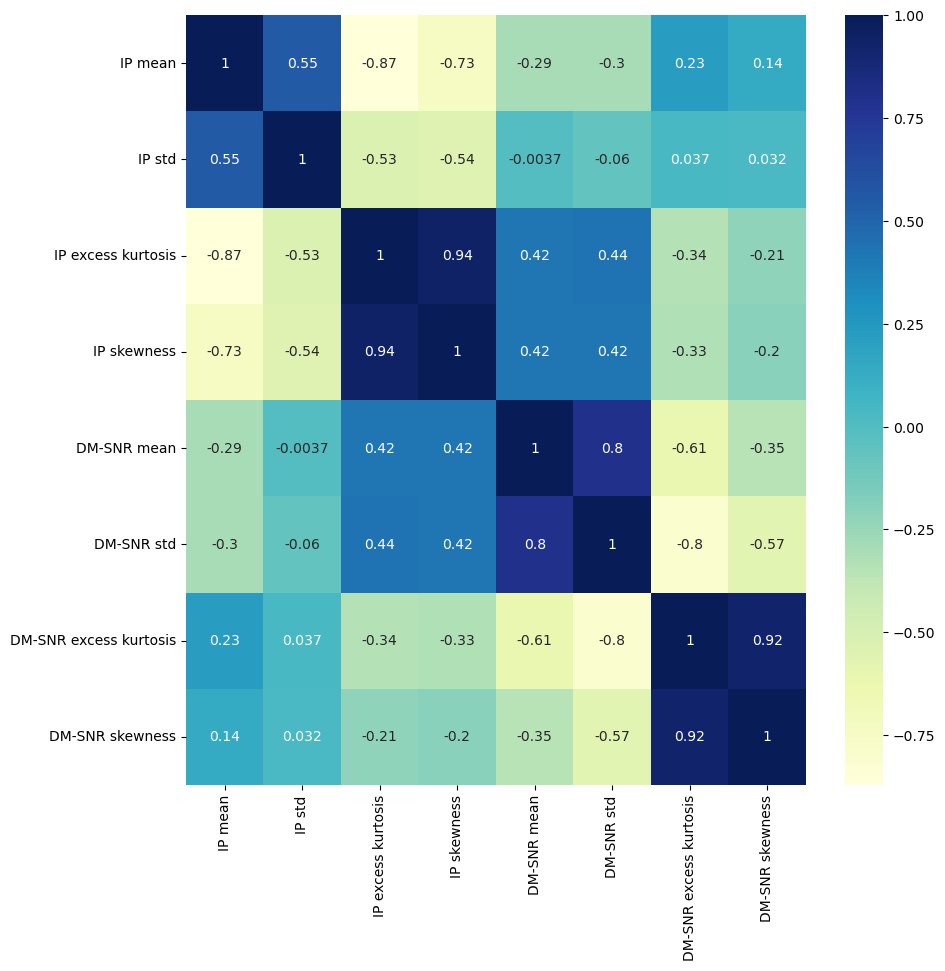

In [23]:
# Displaying heatmap
plt.subplots(figsize=(10, 10))
sns.heatmap(X.corr(method="pearson"), cmap="YlGnBu", annot=True)

In [24]:
# # Drop correlated features
# df_train = df_train.drop(['country'], axis=1)
# df_train = df_train.reset_index(drop=True)
# df_train.columns

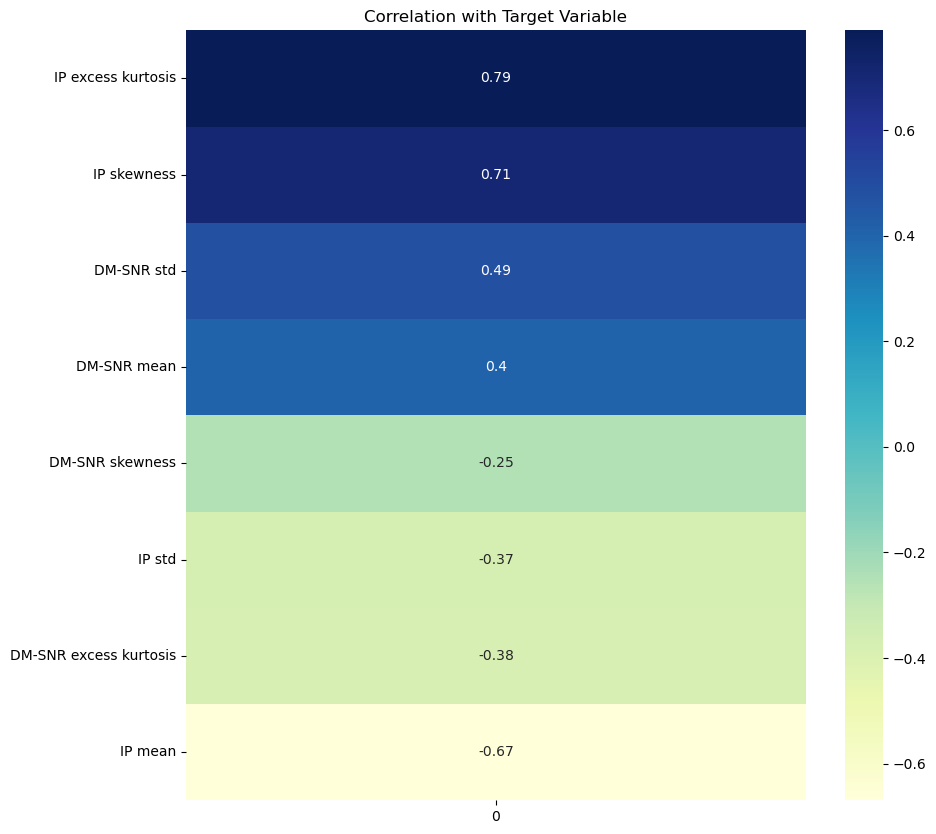

In [25]:
# Create a correlation matrix with target variable
corr_with_target = X.corrwith(y)
corr_with_target = corr_with_target.sort_values(ascending=False)
plt.figure(figsize=(10, 10))
sns.heatmap(corr_with_target.to_frame(), cmap='YlGnBu', annot=True)
plt.title('Correlation with Target Variable')
plt.show()

In [26]:
# # Drop unimportant features
# df_train = df_train.drop(['country'], axis=1)
# df_train = df_train.reset_index(drop=True)
# df_train.columns

In [27]:
# Show categorical columns
categorical_cols = list(set(df_train.columns.to_list()) - set(df_train._get_numeric_data().columns.to_list()))

print("Categorical columns:")
print(sorted(categorical_cols))

Categorical columns:
[]


In [28]:
# # Show unique values in categorical columns
# unique_values = []

# for col in categorical_cols:
#     unique_value = [col]
#     unique_value.append(", ".join(df_train[col].unique()))
#     unique_values.append(unique_value)

# pd.DataFrame(unique_values, columns=["col", "unique values"])

In [29]:
# # Encode categorical columns using OrdinalEncoder

# enc_maps = {
#     "buying price" : [{'col': "buying price", 'mapping': {"low": 0, "medium": 1, "high": 2, "very high": 3}}],
#     "maintenance cost" : [{'col': "maintenance cost", 'mapping': {"low": 0, "medium": 1, "high": 2, "very high": 3}}],
#     "number of doors" : [{'col': "number of doors", 'mapping': {"2": 0, "3": 1, "4": 2, "more": 3}}],
#     "number of persons" : [{'col': "number of persons", 'mapping': {"2": 0, "4": 1, "more": 2}}],
#     "luggage boot" : [{'col': "luggage boot", 'mapping': {"small": 0, "medium": 1, "big": 2}}],
#     "safety" : [{'col': "safety", 'mapping': {"low": 0, "medium": 1, "high": 2}}],
#     "decision" : [{'col': "decision", 'mapping': {"unaccepted": 0, "accepted": 1, "good": 2, "very good": 3}}]
# }

# for col in categorical_cols:
#     enc_map = enc_maps[col]

#     enc = OrdinalEncoder(mapping=enc_map)
#     df_train = enc.fit_transform(df_train)


# df_train

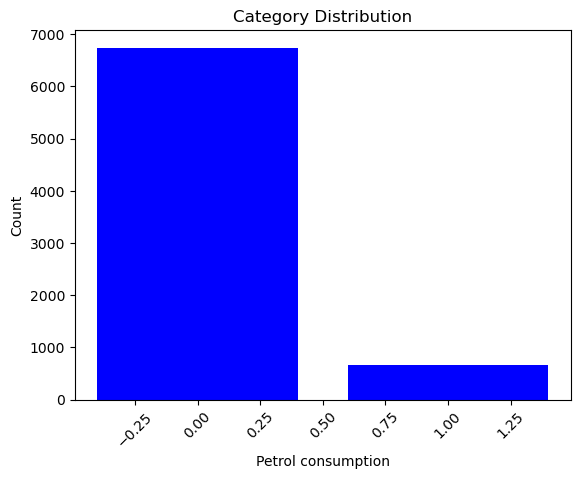

In [30]:
# Distribution of target variable
category_counts = df_train['Target class'].value_counts()

# Plot the count plot
plt.bar(category_counts.index, category_counts.values, color='blue')
plt.xlabel('Petrol consumption')
plt.ylabel('Count')
plt.title('Category Distribution')
plt.xticks(rotation=45)  # Rotate labels for better readability if needed
plt.show()

**Important**: We detect outliers BEFORE creating polynomial features because:
1. Polynomial features amplify outliers exponentially (outlier² creates extreme values)
2. One outlier affects multiple polynomial features simultaneously  
3. This prevents model instability in polynomial regression

Do it when the data is sufficient

In [31]:
# Show all numerical columns
numerical_columns = list(df_train.select_dtypes(include=[np.number]).columns.values)
numerical_columns

['IP mean',
 'IP std',
 'IP excess kurtosis',
 'IP skewness',
 'DM-SNR mean',
 'DM-SNR std',
 'DM-SNR excess kurtosis',
 'DM-SNR skewness',
 'Target class']

In [32]:
# Detect outliers
def detect_outliers_iqr(df, column):    
    """
    Detect outliers using IQR method
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

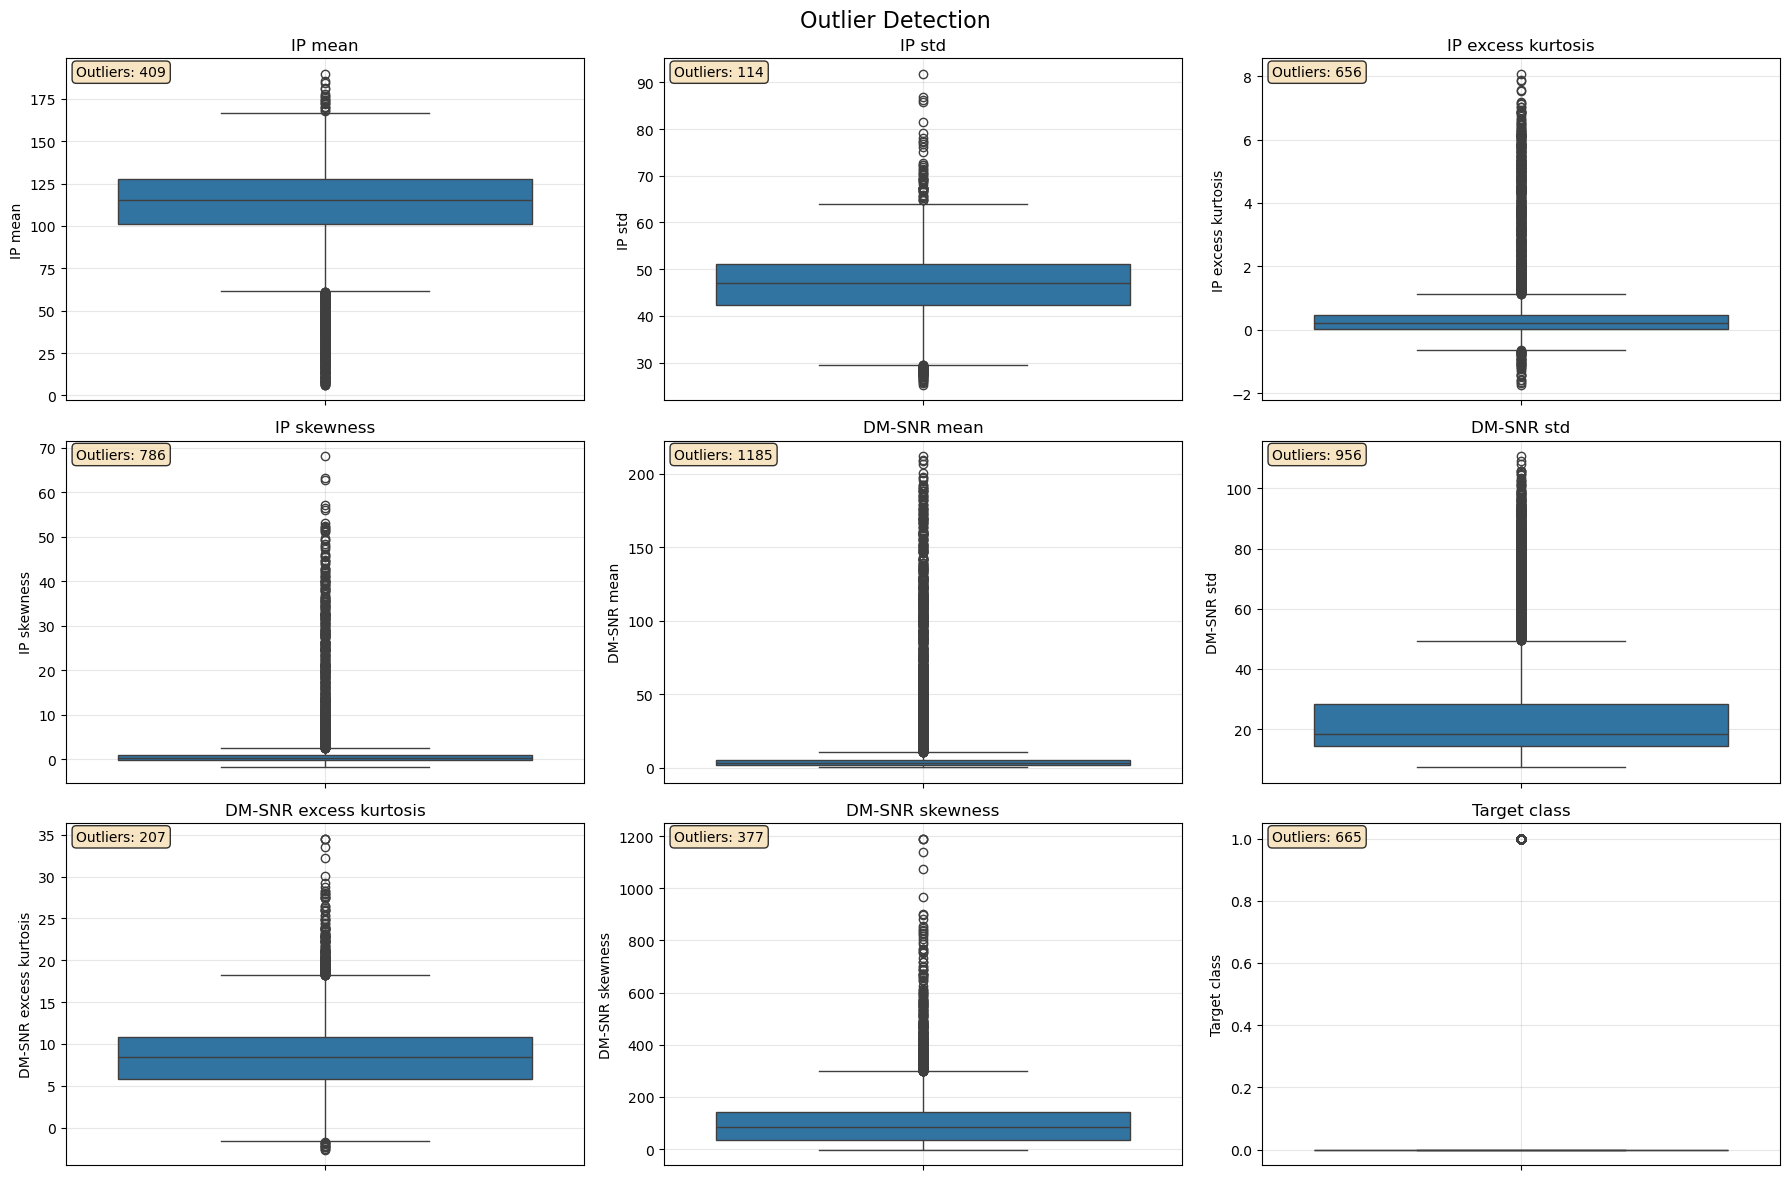

In [33]:
# Create box plots for all numerical features to visualize outliers
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
fig.suptitle('Outlier Detection', fontsize=16)

lower_bounds = dict()
upper_bounds = dict()

for i, col in enumerate(numerical_columns):
    row = i // 3
    col_idx = i % 3
    
    # Create box plot
    sns.boxplot(data=df_train, y=col, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'{col}')
    axes[row, col_idx].grid(True, alpha=0.3)
    
    # Add outlier count as text
    outliers, lower_bound, upper_bound = detect_outliers_iqr(df_train, col)
    lower_bounds[col] = lower_bound
    upper_bounds[col] = upper_bound
    
    axes[row, col_idx].text(0.02, 0.98, f'Outliers: {len(outliers)}', 
                           transform=axes[row, col_idx].transAxes,
                           verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

In [34]:
# # Remove outliers based on IQR method (only if the dataset is big enough)
# for i, col in enumerate(numerical_columns):
    
#     df_train = df_train[df_train[col] >= lower_bounds[col]]
#     df_train = df_train.reset_index(drop=True)
#     df_train = df_train[df_train[col] <= upper_bounds[col]]
#     df_train = df_train.reset_index(drop=True)

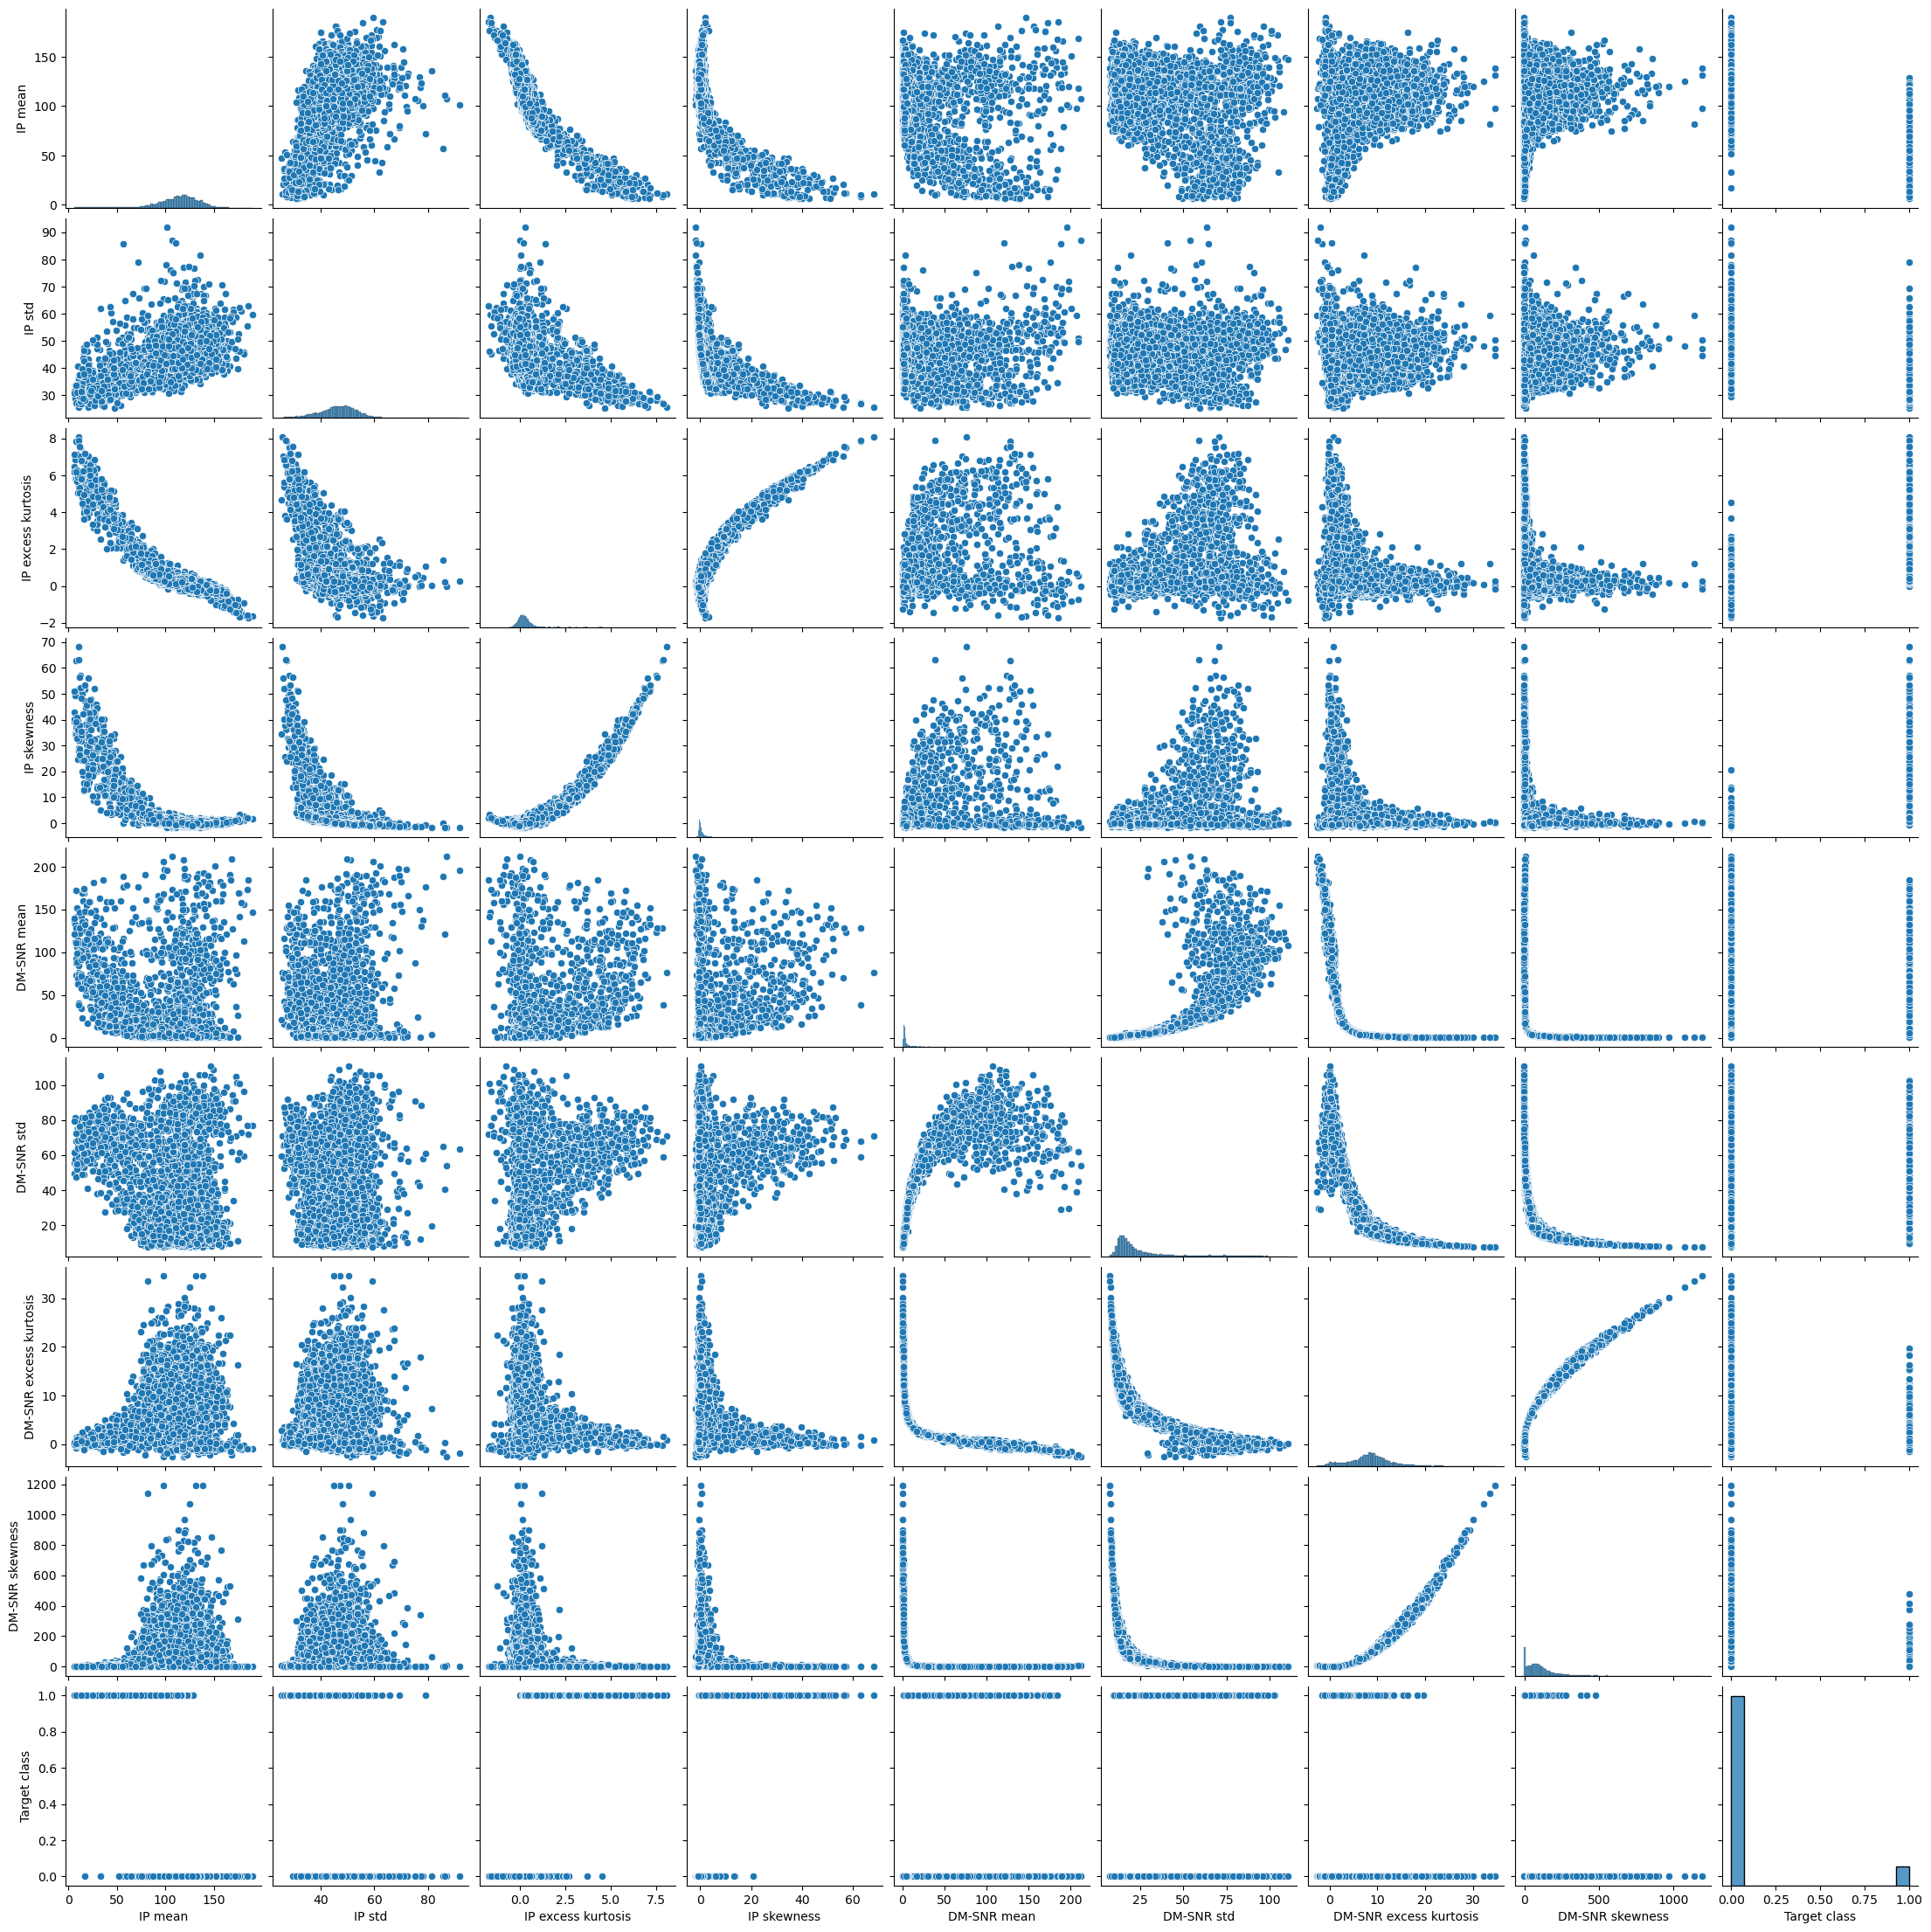

In [35]:
# Show the distribution of all columns
sns.pairplot(df_train)

In [36]:
# Show statistical information of the dataset
df_train.describe()

,IP mean,IP std,IP excess kurtosis,IP skewness,DM-SNR mean,DM-SNR std,DM-SNR excess kurtosis,DM-SNR skewness,Target class
count,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000,7408.000000
mean,111.305435,46.539742,0.471262,1.744874,12.507767,26.233290,8.365262,106.597568,0.089768
std,25.499757,6.779257,1.053095,6.134260,29.338289,19.523575,4.559226,109.262668,0.285868
min,6.187500,25.220056,-1.738021,-1.791886,0.213211,7.370432,-2.636857,-1.976976,0.000000
25%,101.007812,42.408207,0.023543,-0.189800,1.901338,14.345646,5.804526,35.390806,0.000000
50%,115.285156,46.934888,0.221773,0.201966,2.788462,18.372668,8.450657,83.329995,0.000000
75%,127.417969,51.035571,0.470113,0.934944,5.444398,28.340624,10.768715,140.429423,0.000000
max,189.734375,91.808628,8.069522,68.101622,211.948997,110.642211,34.539844,1191.000837,1.000000


In [37]:
# Separate features and labels
y_train = df_train['Target class']
X_train = df_train.drop(['Target class'], axis=1)

In [38]:
# MinMax Scaling
numeric_cols = X_train.select_dtypes(include='number').columns

scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()

X_train[numeric_cols] = scaler_X.fit_transform(X_train[numeric_cols])
y_train = scaler_Y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
pd.DataFrame(y_train, columns=['Target class'])

,Target class
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
7403,0.0
7404,0.0
7405,0.0
7406,0.0


### 3.2 Testing Data

In [39]:
# Size of Dataset
print(f"Number of rows: {df_test.shape[0]}")
print(f"Number of columns: {df_test.shape[1]}")

Number of rows: 2505
Number of columns: 9


In [40]:
# # Drop unnecessary columns
# df_test = df_test.drop(['country'], axis=1)
# df_test = df_test.reset_index(drop=True)
# df_test = df_test.drop(['rank'], axis=1)
# df_test = df_test.reset_index(drop=True)
# df_test.columns

In [41]:
# Remove duplicated columns
# This will retain the first occurrences, change as you want
dup_cols = df_test.columns.duplicated()
cols = list(df_test.columns)
print(f"Duplicated Columns: \n{[cols[i] for i in range(len(cols)) if dup_cols[i]]}")

df_test = df_test.loc[:,~df_test.columns.duplicated()].copy()

print("After removing...")

dup_cols = df_test.columns.duplicated()
cols = list(df_test.columns)
print(f"Duplicated Columns: \n{[cols[i] for i in range(len(cols)) if dup_cols[i]]}")

Duplicated Columns: 
[]
After removing...
Duplicated Columns: 
[]


In [42]:
# Remove row with missing values
df_test = df_test.dropna()
df_test = df_test.reset_index(drop=True)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1865 entries, 0 to 1864
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                1865 non-null   float64
 1    Standard deviation of the integrated profile  1865 non-null   float64
 2    Excess kurtosis of the integrated profile     1865 non-null   float64
 3    Skewness of the integrated profile            1865 non-null   float64
 4    Mean of the DM-SNR curve                      1865 non-null   float64
 5    Standard deviation of the DM-SNR curve        1865 non-null   float64
 6    Excess kurtosis of the DM-SNR curve           1865 non-null   float64
 7    Skewness of the DM-SNR curve                  1865 non-null   float64
 8   target_class                                   1865 non-null   float64
dtypes: float64(9)
memory usage: 131.3 KB


In [43]:
# Rename columns
headers = ["IP mean", "IP std", "IP excess kurtosis",
           "IP skewness", "DM-SNR mean", "DM-SNR std", "DM-SNR excess kurtosis",
           "DM-SNR skewness", "Target class"]
df_test.columns = headers
df_test.columns

Index(['IP mean', 'IP std', 'IP excess kurtosis', 'IP skewness', 'DM-SNR mean',
       'DM-SNR std', 'DM-SNR excess kurtosis', 'DM-SNR skewness',
       'Target class'],
      dtype='object')

In [ ]:
# Change the data type of invalid columns
df_test["Target class"] = df_test["Target class"].astype("int64")
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7408 entries, 0 to 7407
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   IP mean                 7408 non-null   float64
 1   IP std                  7408 non-null   float64
 2   IP excess kurtosis      7408 non-null   float64
 3   IP skewness             7408 non-null   float64
 4   DM-SNR mean             7408 non-null   float64
 5   DM-SNR std              7408 non-null   float64
 6   DM-SNR excess kurtosis  7408 non-null   float64
 7   DM-SNR skewness         7408 non-null   float64
 8   Target class            7408 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 521.0 KB


In [ ]:
# # Drop poor features (to avoid overfitting)
# df_train = df_train.drop(['VendorID'], axis=1)
# df_train = df_train.reset_index(drop=True)
# df_train = df_train.drop(['payment_type'], axis=1)
# df_train = df_train.reset_index(drop=True)
# df_train.columns

In [ ]:
# # Drop correlated features
# df_test = df_test.drop(['country'], axis=1)
# df_test = df_test.reset_index(drop=True)
# df_test.columns

In [ ]:
# # Drop unimportant features
# df_test = df_test.drop(['country'], axis=1)
# df_test = df_test.reset_index(drop=True)
# df_test.columns

In [ ]:
# # Encode categorical columns using OrdinalEncoder
# categorical_cols = list(set(df_test.columns.to_list()) - set(df_test._get_numeric_data().columns.to_list()))

# enc_maps = {
#     "buying price" : [{'col': "buying price", 'mapping': {"low": 0, "medium": 1, "high": 2, "very high": 3}}],
#     "maintenance cost" : [{'col': "maintenance cost", 'mapping': {"low": 0, "medium": 1, "high": 2, "very high": 3}}],
#     "number of doors" : [{'col': "number of doors", 'mapping': {"2": 0, "3": 1, "4": 2, "more": 3}}],
#     "number of persons" : [{'col': "number of persons", 'mapping': {"2": 0, "4": 1, "more": 2}}],
#     "luggage boot" : [{'col': "luggage boot", 'mapping': {"small": 0, "medium": 1, "big": 2}}],
#     "safety" : [{'col': "safety", 'mapping': {"low": 0, "medium": 1, "high": 2}}],
#     "decision" : [{'col': "decision", 'mapping': {"unaccepted": 0, "accepted": 1, "good": 2, "very good": 3}}]
# }

# for col in categorical_cols:
#     enc_map = enc_maps[col]

#     enc = OrdinalEncoder(mapping=enc_map)
#     df_test = enc.fit_transform(df_test)


# df_test

In [45]:
# Separate features and labels
y_test = df_test['Target class']
X_test = df_test.drop(['Target class'], axis=1)

In [46]:
# MinMax Scaling
numeric_cols = X_test.select_dtypes(include='number').columns

scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()

X_test[numeric_cols] = scaler_X.fit_transform(X_test[numeric_cols])
y_test = scaler_Y.fit_transform(y_test.values.reshape(-1, 1)).flatten()
pd.DataFrame(y_test, columns=['Target class'])

,Target class
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
1860,0.0
1861,0.0
1862,0.0
1863,1.0


# 4. SVC

In [49]:
model = SVC()
model.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [50]:
model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

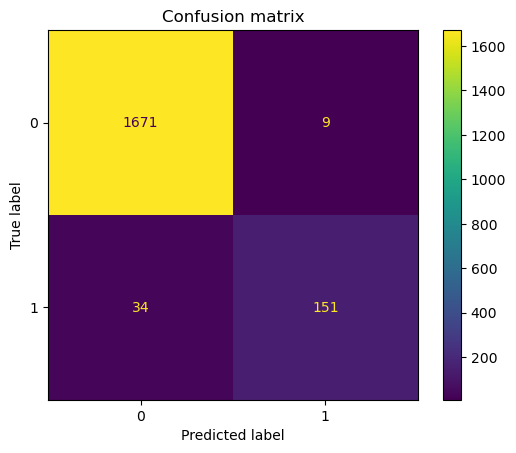

Training acc score: 0.9779967602591793
Testing acc score: 0.9769436997319035

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      1705
         1.0       0.82      0.94      0.88       160

    accuracy                           0.98      1865
   macro avg       0.91      0.96      0.93      1865
weighted avg       0.98      0.98      0.98      1865



In [51]:
# Model evaluation

# Function to plot the multilabel confusion matrix
def plot_multilabel_confusion_matrix(confusion_mtx, class_names):
    num_classes = confusion_mtx.shape[0]
    ncols = 2  # Set the number of columns for the plot
    nrows = (num_classes + ncols - 1) // ncols  # Calculate the number of rows needed

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 4, nrows * 4))
    axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

    for i in range(num_classes):
        ax = axes[i]
        ax.matshow(confusion_mtx[i], cmap=plt.cm.Blues, alpha=0.5)
        ax.set_xlabel('Predicted')
        ax.set_ylabel('True')
        ax.set_title(class_names[i])

        # Show the counts
        for j in range(confusion_mtx[i].shape[0]):
            for k in range(confusion_mtx[i].shape[1]):
                ax.text(k, j, confusion_mtx[i][j, k], ha='center', va='center')

    # Hide any unused subplots
    for i in range(num_classes, len(axes)):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Fungsi untuk mengevaluasi dan mengembalikan hasil sebagai kamus
def evaluate_model(model, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    cm = multilabel_confusion_matrix(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[i for i in range(len(y.unique()))])
    disp.plot()
    plt.title("Confusion matrix")
    plt.show()
    print("Training acc score:", accuracy_score(y_train, y_train_pred))
    print("Testing acc score:", accuracy_score(y_test, y_pred))
    print()
    print(classification_report(y_pred,y_test))

evaluate_model(model, X_test, y_test)

# 5. Tuning

In [52]:
base_model = SVC()

params = {
    'kernel': ["linear", "poly", "rbf", "sigmoid"],
}

grid_search = GridSearchCV(estimator=base_model, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [53]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 4 candidates, totalling 16 fits
CPU times: total: 156 ms
Wall time: 4.02 s


,estimator,SVC()
,param_grid,"{'kernel': ['linear', 'poly', ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,4
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1.0


In [54]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.070731,0.008729,0.017329,0.003394,linear,{'kernel': 'linear'},0.969222,0.976782,0.971382,0.980562,0.974487,0.004459,3
1,0.089276,0.002930,0.016735,0.001088,poly,{'kernel': 'poly'},0.975162,0.978942,0.974622,0.981641,0.977592,0.002870,1
2,0.092577,0.003963,0.054551,0.004976,rbf,{'kernel': 'rbf'},0.974622,0.977322,0.973542,0.981102,0.976647,0.002917,2
3,0.153331,0.003231,0.034532,0.003363,sigmoid,{'kernel': 'sigmoid'},0.910907,0.903888,0.902268,0.901188,0.904563,0.003787,4


In [55]:
best_params = grid_search.best_estimator_
best_params

,C,1.0
,kernel,'poly'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


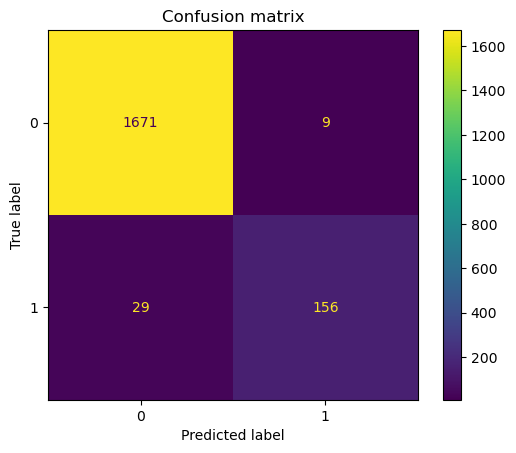

Training acc score: 0.9794816414686826
Testing acc score: 0.9796246648793566

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      1700
         1.0       0.84      0.95      0.89       165

    accuracy                           0.98      1865
   macro avg       0.92      0.96      0.94      1865
weighted avg       0.98      0.98      0.98      1865



In [56]:
# Evaluate the best model
evaluate_model(best_params, X_test, y_test)

# 6. Testing Model (if test dataset exists)